1. Load some Data in the form of Tweets (Already have the text from Tweets)

2. Seperate Tweets into dates: I mean date of publishing

3. For all the Tweets Published in a given day;

A. Remove the URLS

Calculate the pairwise Cosine Similarity . Save the data in a csv file.

Calculate the pairwise Jaccrad Similarity. Save the data in a csv file.

Calculate the TF_IDF Similarity. Save the data in a csv file.

B. Break the Tweet into Tokens

Remove stop words

Count the Frequency of top 10 occuring keyword for every day. Save the data into a csv file

Use Kmeans clustering to cluster word tokens...Save number of Clusters and Words in

Visualize Clusters and the words that are in that clusters in the form of word bubble

# 1. Load some Data in the form of Tweets (Already have the text from Tweets)

In [7]:
import csv
bodyText=[]
with open('realFinalNHB.csv',"rt") as f:
    reader = csv.reader(f)
    for row in reader:
#         print(row)
        bodyText.append(row)
bodyText.remove(['', 'author', 'publicationTime', 'bodyText'])
print(bodyText[0])
# lasim=[]
# with open('pairwise_jaccard_similiarity.csv',"rt") as f:
#     reader = csv.reader(f)
#     for row in reader:
#         lasim.append(row)
# print(len(lasim))

['0', 'id:twitter.com:2209799083', '10/02/2016 10:30', "RT @350Australia: Adani Group's Aust #coal mining troubles far from over. \nhttps://t.co/KO1rp5LlQs https://t.co/iKRHZphy7Q"]


# 2. Seperate Tweets into dates: I mean date of publishing

# 3. For all the Tweets Published in a given day;

In [8]:
publicationDate={}
with open('realFinalNHB.csv',"rt") as f:
    reader = csv.reader(f)
    for row in reader:
#         print(row)
      if row[2] != 'publicationTime':
        publicationDate[row[2].split(' ')[0]]=[]
print(publicationDate)
with open('realFinalNHB.csv',"rt") as f:
    reader = csv.reader(f)
    for row in reader:
        if row[2] != 'publicationTime' and row[3] != 'bodyText' and row[2]!= '' and row[3]!='':
            publicationDate[row[2].split(' ')[0]].append(row[3])
print(publicationDate['10/02/2016'][0])


{'10/02/2016': [], '11/02/2016': [], '12/02/2016': [], '13/02/2016': [], '14/02/2016': [], '15/02/2016': [], '16/02/2016': [], '17/02/2016': [], '18/02/2016': [], '19/02/2016': [], '20/02/2016': [], '21/02/2016': [], '22/02/2016': [], '23/02/2016': [], '24/02/2016': [], '25/02/2016': [], '26/02/2016': [], '27/02/2016': [], '28/02/2016': [], '29/02/2016': [], '1/03/2016': [], '2/03/2016': [], '3/03/2016': [], '4/03/2016': [], '5/03/2016': [], '6/03/2016': [], '7/03/2016': [], '8/03/2016': [], '': [], '9/03/2016': [], '10/03/2016': [], '11/03/2016': [], '15/03/2016': [], '16/03/2016': []}
RT @350Australia: Adani Group's Aust #coal mining troubles far from over. 
https://t.co/KO1rp5LlQs https://t.co/iKRHZphy7Q


# A. Remove the URLS

In [9]:
import re
with open('realFinalNHB.csv',"rt") as f:
    reader = csv.reader(f)
    for row in reader:
#         print(row)
      if row[2] != 'publicationTime':
        publicationDate[row[2].split(' ')[0]]=[]
with open('realFinalNHB.csv',"rt") as f:
    reader = csv.reader(f)
    for row in reader:
        if row[2] != 'publicationTime' and row[3] != 'bodyText' and row[2]!= '' and row[3]!='':
            publicationDate[row[2].split(' ')[0]].append(re.sub(r'http\S+', '', row[3]))
print(publicationDate['10/02/2016'][0])

RT @350Australia: Adani Group's Aust #coal mining troubles far from over. 
 


# Calculate the pairwise Cosine Similarity . Save the data in a csv file.

In [11]:
tokenize = lambda doc: doc.lower().split(" ")
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
# nltk.download()
tfidf_vectorizer = TfidfVectorizer(tokenizer=nltk.word_tokenize)
tfidf_matrix = tfidf_vectorizer.fit_transform(publicationDate['10/02/2016'])
print(len(tfidf_matrix.toarray()))

import math
def cosine_similarity(vector1, vector2):
    dot_product = sum(p*q for p,q in zip(vector1, vector2))
    magnitude = math.sqrt(sum([val**2 for val in vector1])) * math.sqrt(sum([val**2 for val in vector2]))
    if not magnitude:
        return 0
    return dot_product/magnitude

import itertools
panda=[]
for i in range(tfidf_matrix.shape[0]):
    panda.append(i)
# print(tfidf_matrix.shape)
import numpy as np
myData=[['pairwise','word1','word2','cosine_similiarity']]
peki=0
def to_str(var):
    return str(list(np.reshape(np.asarray(var), (1, np.size(var)))[0]))[1:-1]
for each in itertools.permutations(panda,2):
#     peki+=1
#     print(peki)

    similarities_sparse = cosine_similarity(tfidf_matrix.toarray()[each[0]],tfidf_matrix.toarray()[each[1]])
    myData.append(['('+str(each[0])+','+str(each[1])+')',publicationDate['10/02/2016'][each[0]],publicationDate['10/02/2016'][each[1]],to_str(similarities_sparse)])

myFile = open('pairwise_cosine_similiarity.csv', 'w', newline='')  
with myFile:  
    writer = csv.writer(myFile)
    writer.writerows(myData)
print("done")




263
done


# Calculate the pairwise Jaccrad Similarity. Save the data in a csv file.

In [12]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
import nltk
# from nltk.tokenize import word_tokenize
tokenized_documents = [list(filter(None, nltk.word_tokenize(d))) for d in publicationDate['10/02/2016']]
pelepasan=[]
for i in range(len(tokenized_documents)):
    pelepasan.append(i)
peki=0
myData=[['pairwise','word1','word2','jaccard_similiarity']]
for each in itertools.permutations(pelepasan,2):
#     peki+=1
#     print(peki)
    jaccard_similiarities = jaccard_similarity(tokenized_documents[each[0]],tokenized_documents[each[1]])
    myData.append(['('+str(each[0])+','+str(each[1])+')',publicationDate['10/02/2016'][each[0]],publicationDate['10/02/2016'][each[1]],to_str(jaccard_similiarities)])

myFile = open('pairwise_jaccard_similiarity.csv', 'w', newline='')  
with myFile:  
    writer = csv.writer(myFile)
    writer.writerows(myData)
print("done")


done


# Calculate the TF_IDF Similarity. Save the data in a csv file.

In [13]:
def to_str(var):
    import numpy as np
    return str(list(np.reshape(np.asarray(var), (1, np.size(var)))[0]))[1:-1]
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
# nltk.download()
sklearn_tfidf = TfidfVectorizer(norm='l2',min_df=0, use_idf=True, smooth_idf=False, sublinear_tf=True, tokenizer=nltk.word_tokenize)
sklearn_representation = sklearn_tfidf.fit_transform(publicationDate['10/02/2016'])
# print(publicationDate['10/02/2016'][260])
feature_names = sklearn_tfidf.get_feature_names()
# doc = 260
tokenized_documents = [list(filter(None, nltk.word_tokenize(d))) for d in publicationDate['10/02/2016']]
myData=[['word','tf-idf']]
lasagna=0
# pelepasan=[]
for doc in range(len(tokenized_documents)):
#     print(doc)
#     pelepasan.append(i)
    feature_index = sklearn_representation[doc,:].nonzero()[1]
    tfidf_scores = zip(feature_index, [sklearn_representation[doc, x] for x in feature_index])
    dict={}
    for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
        if w != '':
            dict[w]=s
    myData.append([publicationDate['10/02/2016'][doc],to_str(dict)])
#     print( w, s)
# print(dict)
myFile = open('TF_IDF_similiarity.csv', 'w', newline='')  
with myFile:  
    writer = csv.writer(myFile)
    writer.writerows(myData)
print("done")

done


# B. Break the Tweet into Tokens

In [14]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tokenized_documents = [list(filter(None, tokenizer.tokenize(d))) for d in publicationDate['10/02/2016']]
tokenized_documents

[['RT',
  'Australia',
  'Adani',
  'Group',
  's',
  'Aust',
  'coal',
  'mining',
  'troubles',
  'far',
  'from',
  'over'],
 ['RT',
  'avivaimhof',
  'Poor',
  'old',
  'coal',
  'Now',
  'even',
  'Vietnam',
  'is',
  'moving',
  'away',
  'from',
  'it'],
 ['RT',
  'market',
  'forces',
  'Funds',
  'have',
  'burned',
  'billions',
  'of',
  'dollars',
  'of',
  'our',
  'super',
  'on',
  'dirty',
  'fossilfuels',
  'investment',
  'coal'],
 ['RT',
  'avivaimhof',
  'Vietnam',
  'PM',
  'Announces',
  'Retreat',
  'from',
  'Coal',
  'Power',
  'Another',
  'blow',
  'to',
  'global',
  'coal',
  'industry',
  'zdaniel',
  'mik'],
 ['RT',
  'Australia',
  'Adani',
  'Group',
  's',
  'Aust',
  'coal',
  'mining',
  'troubles',
  'far',
  'from',
  'over'],
 ['RT',
  'QldGreens',
  'How',
  'times',
  'change',
  'Published',
  'on',
  'QLD',
  'Labor',
  's',
  'Facebook',
  'on',
  'Jan',
  'coal',
  'Adani',
  'GreatBarrierReef',
  'qldpol',
  'auspol'],
 ['RT',
  'LockTheGat

# Remove stop words

In [15]:
# from nltk.corpus import stopwords
# # ...
# import nltk
# filtered_words = [word for word in tokenized_documents if word not in stopwords.words('english')]
# filtered_words
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
super_filter=[]
for j in range(len(tokenized_documents)):
    filtered_sentence = []
 
    for w in tokenized_documents[j]:
        if w not in stop_words:
            filtered_sentence.append(w)
    super_filter.append(filtered_sentence)
# print('it' in stop_words)
# super_filter
salam= [' '.join(x) for x in super_filter]
salam

['RT Australia Adani Group Aust coal mining troubles far',
 'RT avivaimhof Poor old coal Now even Vietnam moving away',
 'RT market forces Funds burned billions dollars super dirty fossilfuels investment coal',
 'RT avivaimhof Vietnam PM Announces Retreat Coal Power Another blow global coal industry zdaniel mik',
 'RT Australia Adani Group Aust coal mining troubles far',
 'RT QldGreens How times change Published QLD Labor Facebook Jan coal Adani GreatBarrierReef qldpol auspol',
 'RT LockTheGate Ex ICAC commish lays line need overhaul coal laws across Oz stop corruption',
 'Brisbane forum Air pollution coal amp public health experts EJ Aus EDO QLD DocsEnvAus cleanair',
 'coal nature launched legal action approval Springvale coal mine extension Sydney water catchment',
 'Climate Angels Arrested For Watching Over Santos CSG auspol NO coal thorium nuclear',
 'RT MineralsCouncil Japan approves building new coal fired power plants coal mining',
 'auspol NO coal thorium nuclear',
 'RT micksfo

# Count the Frequency of top 10 occuring keyword for every day. Save the data into a csv file

In [16]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
def term_frequency(term, tokenized_document):
    return tokenized_document.count(term)
def countTop(key):
    juiko={}
    import nltk
    tokenized_documents = [list(filter(None, tokenizer.tokenize(d))) for d in publicationDate[key]]
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    super_filter=[]
    for j in range(len(tokenized_documents)):
            filtered_sentence = []
 
            for w in tokenized_documents[j]:
              if w not in stop_words:
                filtered_sentence.append(w)
            super_filter.append(filtered_sentence)
    for doci in range(len(super_filter)):
        for docin in range(len(super_filter[doci])):
            if super_filter[doci][docin] not in juiko:
                juiko[super_filter[doci][docin]]=term_frequency(super_filter[doci][docin],super_filter[doci])
            else:
                juiko[super_filter[doci][docin]]+=term_frequency(super_filter[doci][docin],super_filter[doci])
    lasi=sorted(juiko.items(), key=lambda kv: kv[1], reverse=True)
    
    sania=[]
    for san in range(10):
        sania.append(lasi[san])
    
    return [key,sania]
saju=[['day','top_ten_words']]

for key, value in publicationDate.items():
    if key!='':
        saju.append(countTop(key))
# print(saju)
myFile = open('top_ten_words.csv', 'w', newline='')  
with myFile:  
    writer = csv.writer(myFile)
    writer.writerows(saju)
print("done")

done


# Use Kmeans clustering to cluster word tokens...Save number of Clusters and Words in Visualize Clusters and the words that are in that clusters in the form of word bubble

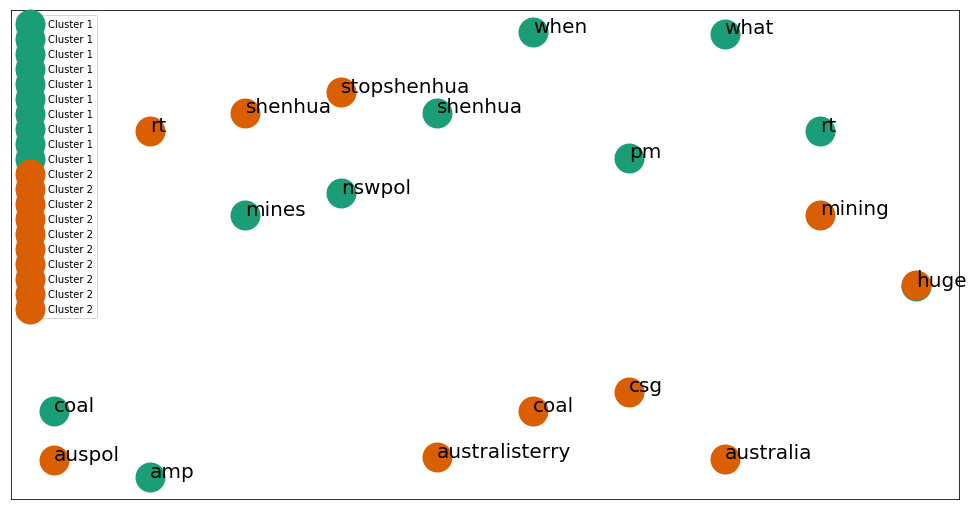

In [40]:
import os  # for os.path.basename


from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
# nltk.download()
import pandas as pd

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer.tokenize)
tfidf_matrix = tfidf_vectorizer.fit_transform(salam) 
terms = tfidf_vectorizer.get_feature_names()

from sklearn.cluster import KMeans

num_clusters = 2

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

model = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=1)
model.fit(tfidf_matrix)
 
# print(clusters)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names()
cipok=[]
for i in range(num_clusters):
#     print("Cluster %d:" % i)
    candid=[]
    for ind in order_centroids[i]:
        candid.append([ind,terms[ind]])
#         print(' %s' % terms[ind]),
    cipok.append(candid)

import matplotlib.pyplot as plt
import matplotlib as mpl


cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}

#set up cluster names using a dict
cluster_names = {0: 'Cluster 1', 
                 1: 'Cluster 2', 
                 2: 'Cluster 3'
                 }

%matplotlib inline 

fig, ax = plt.subplots(figsize=(17,9))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling


for ko in range(len(cipok)):
    for ki in range(10):  
        ax.plot(ki, cipok[ko][ki][0], marker='o', linestyle='', ms=30,
            label=cluster_names[ko], color=cluster_colors[ko], 
            mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
           axis= 'x',          # changes apply to the x-axis
           which='both',      # both major and minor ticks are affected
           bottom='off',      # ticks along the bottom edge are off
           top='off',         # ticks along the top edge are off
           labelbottom='off')
        ax.tick_params(\
           axis= 'y',         # changes apply to the y-axis
           which='both',      # both major and minor ticks are affected
           left='off',      # ticks along the bottom edge are off
           top='off',         # ticks along the top edge are off
           labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
# for i in range(len(df)):
#     ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=10)
for i in range(len(cipok)):
    for b in range(10):
#         print(cipok[i][b][0])
        ax.text(b,cipok[i][b][0] , cipok[i][b][1], size=20)

    
    
plt.show() #show the plot

In [41]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data[:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print("Fitting the NMF model with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Loading dataset...
done in 1.706s.
Extracting tf-idf features for NMF...
done in 0.430s.
Extracting tf features for LDA...
done in 0.391s.
Fitting the NMF model with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.414s.

Topics in NMF model:
Topic #0:
just people don think like know time good make way really say right ve want did ll new use years
Topic #1:
windows use dos using window program os drivers application help software pc running ms screen files version card code work
Topic #2:
god jesus bible faith christian christ christians does heaven sin believe lord life church mary atheism belief human love religion
Topic #3:
thanks know does mail advance hi info interested email anybody looking card help like appreciated information send list video need
Topic #4:
car cars tires miles 00 new engine insurance price condition oil power speed good 000 brake year models used bought
Topic #5:
edu soon com send university internet mit ftp mail cc pub article information hope

In [80]:
['lam','cam'].index('slam')

ValueError: 'slam' is not in list